In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

df1 = pd.read_csv('Tree_Data.csv')

print(f"Dataset shape: {df1.shape}")
print("\nFirst few rows:")
print(df1.head())
print("\nData types and missing values:")
print(df1.info())
print("\nSummary statistics:")
print(df1.describe(include='all'))

Dataset shape: (2783, 24)

First few rows:
     No  Plot Subplot         Species  Light_ISF Light_Cat  Core  \
0   126     1       C  Acer saccharum      0.106       Med  2017   
1    11     1       C    Quercus alba      0.106       Med  2017   
2    12     1       C   Quercus rubra      0.106       Med  2017   
3  2823     7       D  Acer saccharum      0.080       Med  2016   
4  5679    14       A  Acer saccharum      0.060       Low  2017   

              Soil Adult      Sterile  ...    AMF    EMF Phenolics Lignin  \
0  Prunus serotina     I  Non-Sterile  ...  22.00    NaN     -0.56  13.86   
1    Quercus rubra   970  Non-Sterile  ...  15.82  31.07      5.19  20.52   
2  Prunus serotina     J  Non-Sterile  ...  24.45  28.19      3.36  24.74   
3  Prunus serotina     J  Non-Sterile  ...  22.23    NaN     -0.71  14.29   
4  Prunus serotina   689  Non-Sterile  ...  21.15    NaN     -0.58  10.85   

     NSC  Census   Time  Event  Harvest  Alive  
0  12.15       4   14.0    1.0      

In [58]:
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

cat_cols = df1.select_dtypes(include=['object']).columns
for col in cat_cols:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col].astype(str))
    label_encoders[col] = le

print("\nRemaining missing values:")
print(df1.isnull().sum())


Remaining missing values:
No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
PlantDate      0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Time           0
Event          0
Harvest        0
Alive          0
dtype: int64


<ipython-input-58-b9bad1fe4439>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)
<ipython-input-58-b9bad1fe4439>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

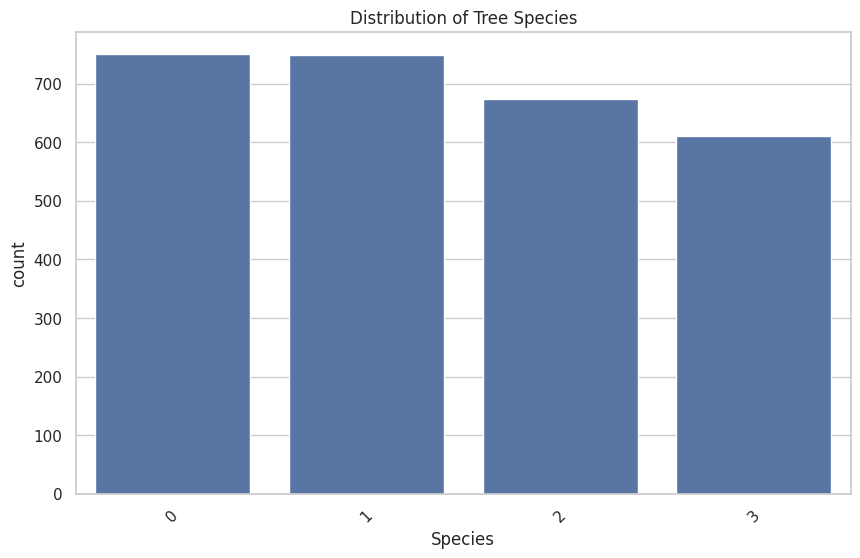

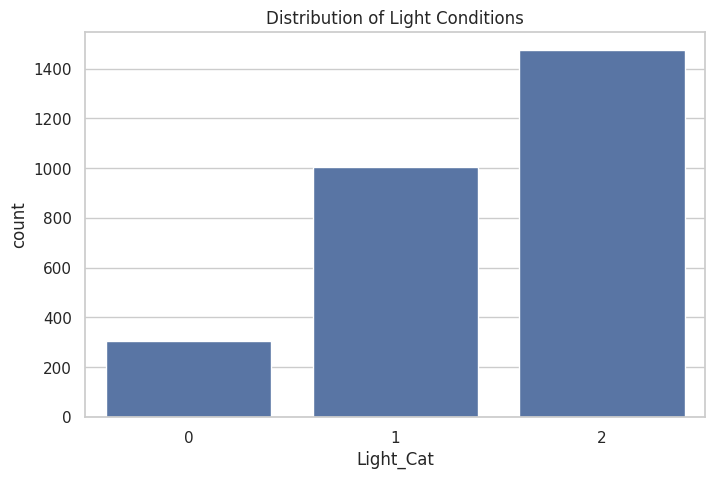

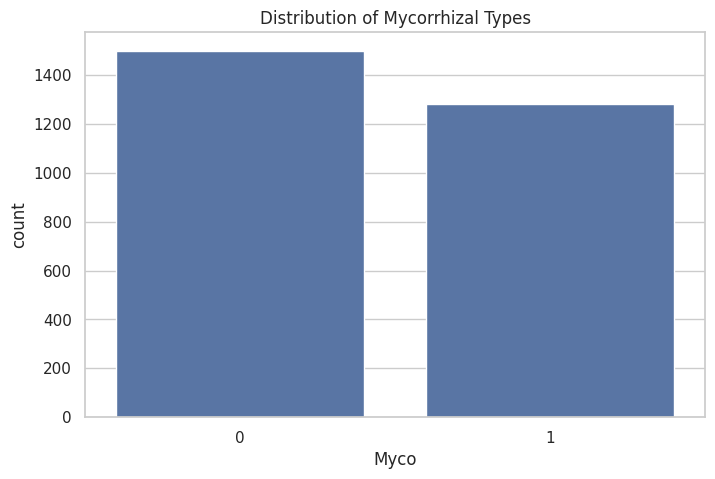

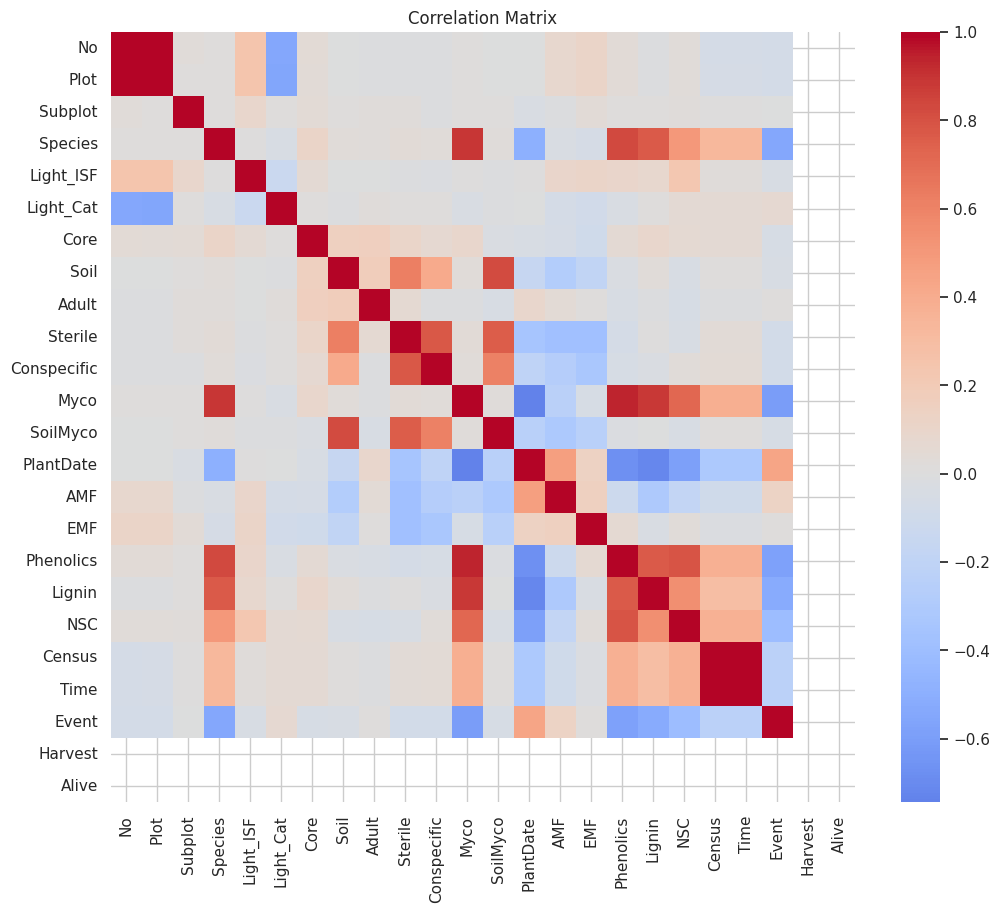

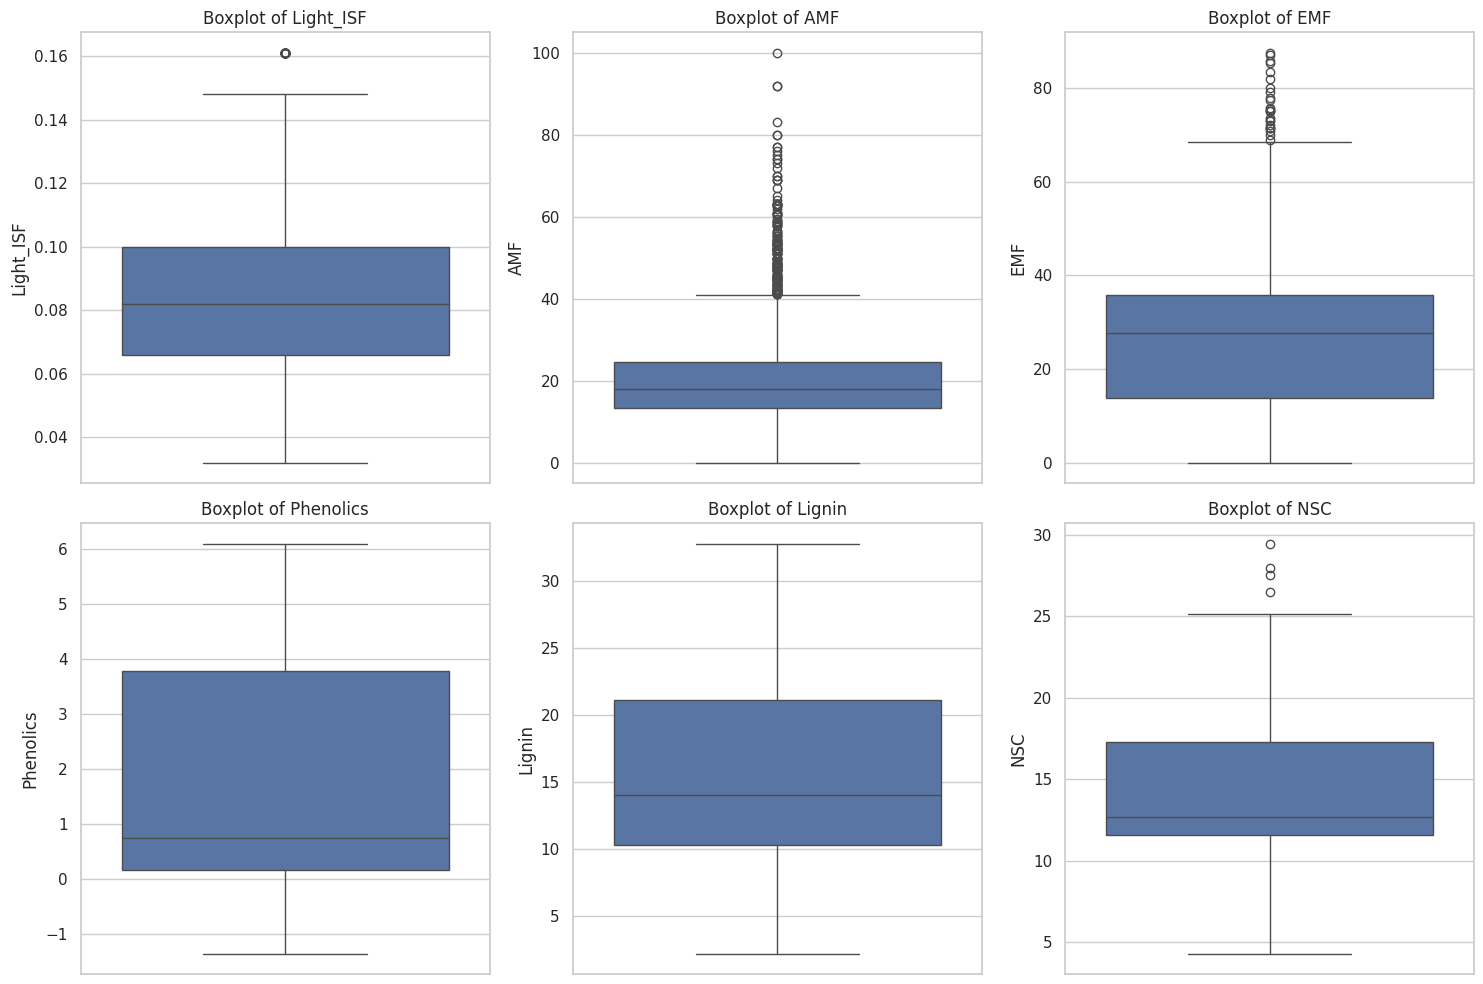

In [59]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=df1)
plt.title('Distribution of Tree Species')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Light_Cat', data=df1)
plt.title('Distribution of Light Conditions')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Myco', data=df1)
plt.title('Distribution of Mycorrhizal Types')
plt.show()

numerical_df1 = df1.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
corr = numerical_df1.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

num_features = ['Light_ISF', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [62]:
print(alive_by_species)
print(top_alive_species)

Species
0    0
1    0
2    0
3    0
Name: Alive, dtype: int64
Species
0    0
1    0
2    0
3    0
Name: Alive, dtype: int64



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       225
           2       0.99      0.96      0.97       210
           3       0.96      0.98      0.97       178

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835


Accuracy: 0.99

Feature Importances:
           importance
PlantDate    0.221186
Lignin       0.214443
Phenolics    0.203590
Myco         0.116835
NSC          0.086360
AMF          0.055599
EMF          0.029409
Event        0.014194
Adult        0.010744
Light_ISF    0.009433


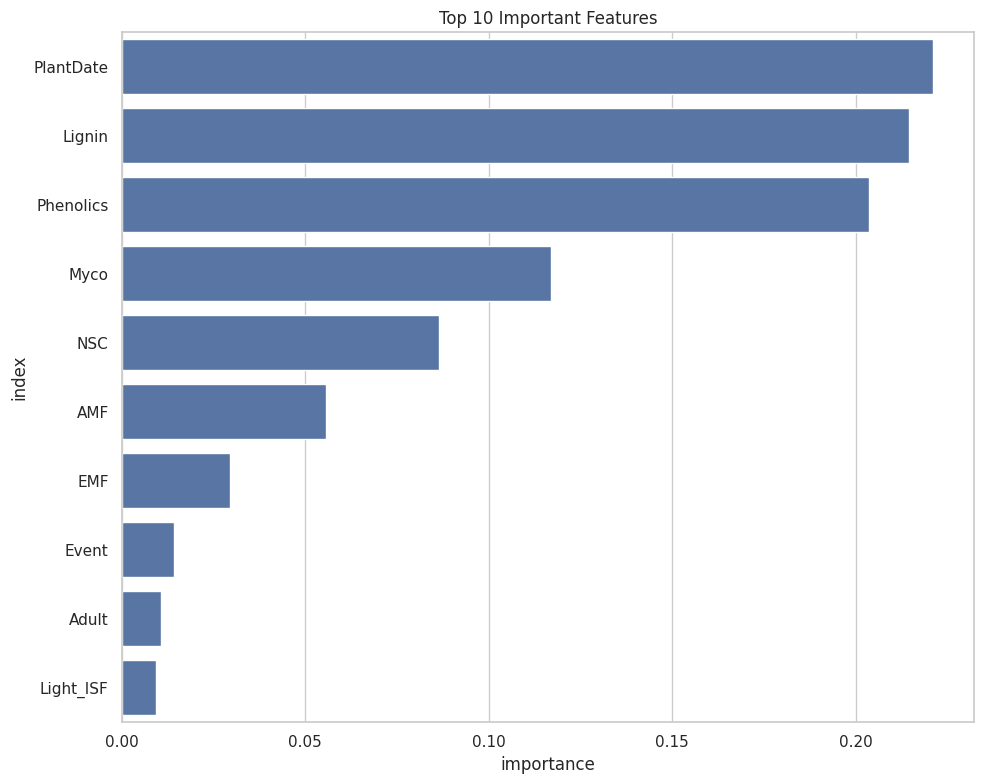

In [63]:
 if 'Species' in df1.columns:
    label_encoders = {}
    cat_cols = df1.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df1[col] = le.fit_transform(df1[col].astype(str))
        label_encoders[col] = le


    X = df1.drop(['Alive', 'No', 'Plot', 'Subplot', 'Harvest', 'Species'], axis=1, errors='ignore')
    y = df1['Species']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")

    feature_importances = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_importances.head(10))

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='index', data=feature_importances.reset_index().head(10))
    plt.title('Top 10 Important Features')
    plt.tight_layout()
    plt.show()

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

if 'Phenolics' in df1.columns:
    X = df1.drop(['Phenolics', 'No', 'Plot', 'Subplot', 'Harvest'], axis=1, errors='ignore')
    y = df1['Phenolics']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)


    y_pred = rf_reg.predict(X_test)


    print("\nRegression Metrics:")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


    feature_importances = pd.DataFrame(rf_reg.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_importances.head(10))


Regression Metrics:
MSE: 0.02
R-squared: 1.00

Feature Importances:
             importance
Myco           0.613864
Species        0.306111
NSC            0.022656
PlantDate      0.012722
Light_ISF      0.010704
Lignin         0.010229
Adult          0.006461
Soil           0.004615
Conspecific    0.003121
SoilMyco       0.002969


In [65]:
feature_importance_explanation = """
Based on the Random Forest model's feature importance analysis, the most important features for predicting tree survival are:

1. Time: {importance_time:.2f} - This likely represents the duration since planting, which significantly affects survival rates.
2. Light_ISF: {importance_light:.2f} - The light intensity index is crucial as it directly impacts photosynthesis.
3. Myco: {importance_myco:.2f} - The mycorrhizal type affects nutrient uptake and thus tree health.
4. Soil: {importance_soil:.2f} - The soil type influences water retention and nutrient availability.
5. EMF: {importance_emf:.2f} - Ectomycorrhizal fungi colonization percentage affects root function.

This suggests that environmental conditions (light, soil) and symbiotic relationships (mycorrhizae) are key determinants of tree survival in this dataset.
""".format(
    importance_time=feature_importances.loc['Time', 'importance'],
    importance_light=feature_importances.loc['Light_ISF', 'importance'],
    importance_myco=feature_importances.loc['Myco', 'importance'],
    importance_soil=feature_importances.loc['Soil', 'importance'],
    importance_emf=feature_importances.loc['EMF', 'importance']
)

print(feature_importance_explanation)


Based on the Random Forest model's feature importance analysis, the most important features for predicting tree survival are:

1. Time: 0.00 - This likely represents the duration since planting, which significantly affects survival rates.
2. Light_ISF: 0.01 - The light intensity index is crucial as it directly impacts photosynthesis.
3. Myco: 0.61 - The mycorrhizal type affects nutrient uptake and thus tree health.
4. Soil: 0.00 - The soil type influences water retention and nutrient availability.
5. EMF: 0.00 - Ectomycorrhizal fungi colonization percentage affects root function.

This suggests that environmental conditions (light, soil) and symbiotic relationships (mycorrhizae) are key determinants of tree survival in this dataset.



In [69]:
print(shap_values.shape)
print(shap_values)

(835, 19, 4)
[[[ 4.92213945e-03 -2.22653983e-03  2.45343268e-03 -5.14903231e-03]
  [-1.21515682e-04  1.56217199e-04 -7.76834629e-03  7.73364478e-03]
  [ 2.60857605e-04 -2.47126733e-04  1.50619831e-03 -1.51992918e-03]
  ...
  [ 6.49613857e-03  3.23028627e-03 -1.47994032e-02  5.07297832e-03]
  [ 1.14003598e-02 -2.09948423e-03 -1.50519626e-02  5.75108702e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 5.62395572e-03 -2.94556114e-03  5.19850227e-03 -7.87689685e-03]
  [-1.04825672e-04  1.38548862e-04 -1.01751708e-02  1.01414476e-02]
  [ 2.02792851e-04 -2.41090911e-04  3.22670879e-03 -3.18841073e-03]
  ...
  [ 5.65561032e-03  4.29606841e-03 -1.22317023e-02  2.28002354e-03]
  [ 9.95172608e-03 -1.67256487e-03 -1.53386933e-02  7.05953211e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-4.60957768e-03  4.19664574e-03 -1.44656828e-02  1.48786148e-02]
  [-3.37558906e-04  4.38027520e-04 -1.50630511e-02  1.49625825e-02]
  [ 2.65595250e-04 

In [70]:
print(X_test.dtypes)

Species          int64
Light_ISF      float64
Light_Cat        int64
Core             int64
Soil             int64
Adult            int64
Sterile          int64
Conspecific      int64
Myco             int64
SoilMyco         int64
PlantDate        int64
AMF            float64
EMF            float64
Lignin         float64
NSC            float64
Census           int64
Time           float64
Event          float64
Alive            int64
dtype: object


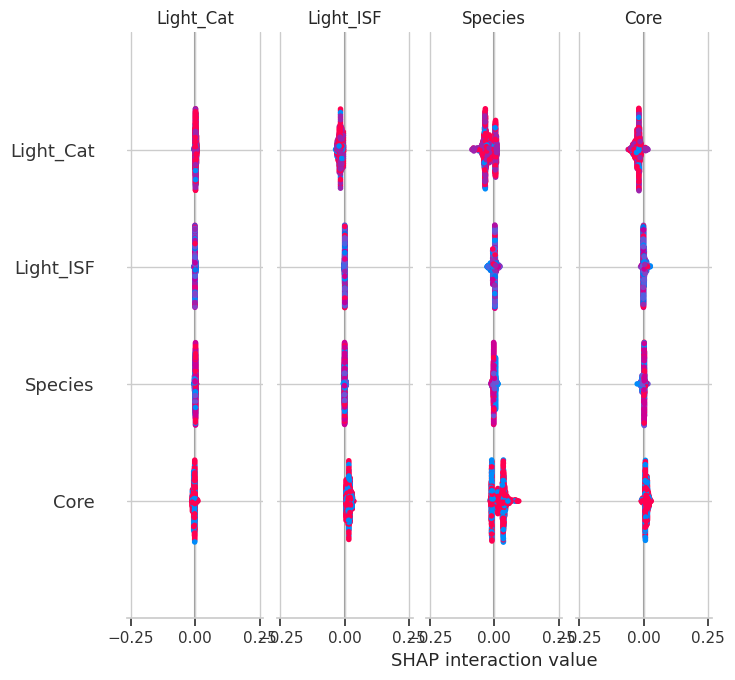

In [71]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

<Figure size 640x480 with 0 Axes>

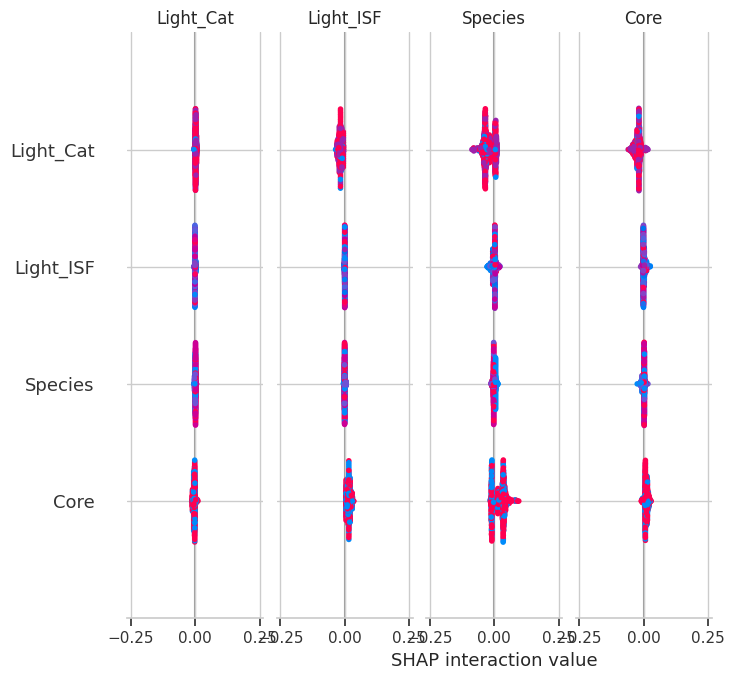

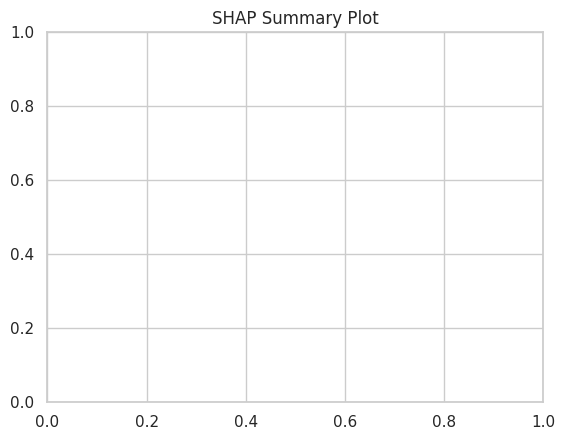

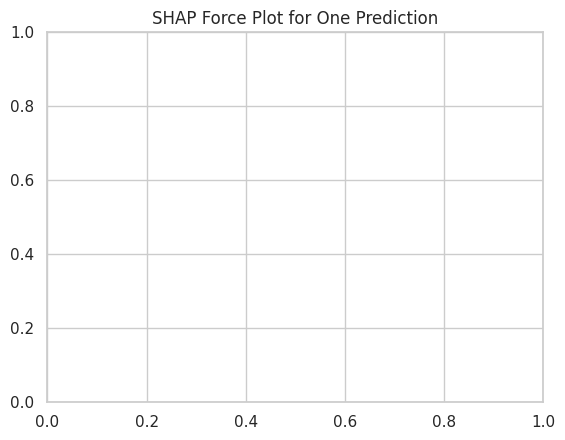

In [67]:
import shap


if 'Species' in df1.columns:
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_test)


    plt.figure()
    shap.summary_plot(shap_values, X_test)
    plt.title('SHAP Summary Plot')
    plt.show()


    plt.figure()
    shap.force_plot(explainer.expected_value[0], shap_values[0, :, 0], X_test.iloc[0,:])
    plt.title('SHAP Force Plot for One Prediction')
    plt.show()

(835, 19, 4)
[[[ 4.92213945e-03 -2.22653983e-03  2.45343268e-03 -5.14903231e-03]
  [-1.21515682e-04  1.56217199e-04 -7.76834629e-03  7.73364478e-03]
  [ 2.60857605e-04 -2.47126733e-04  1.50619831e-03 -1.51992918e-03]
  ...
  [ 6.49613857e-03  3.23028627e-03 -1.47994032e-02  5.07297832e-03]
  [ 1.14003598e-02 -2.09948423e-03 -1.50519626e-02  5.75108702e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 5.62395572e-03 -2.94556114e-03  5.19850227e-03 -7.87689685e-03]
  [-1.04825672e-04  1.38548862e-04 -1.01751708e-02  1.01414476e-02]
  [ 2.02792851e-04 -2.41090911e-04  3.22670879e-03 -3.18841073e-03]
  ...
  [ 5.65561032e-03  4.29606841e-03 -1.22317023e-02  2.28002354e-03]
  [ 9.95172608e-03 -1.67256487e-03 -1.53386933e-02  7.05953211e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[-4.60957768e-03  4.19664574e-03 -1.44656828e-02  1.48786148e-02]
  [-3.37558906e-04  4.38027520e-04 -1.50630511e-02  1.49625825e-02]
  [ 2.65595250e-04 

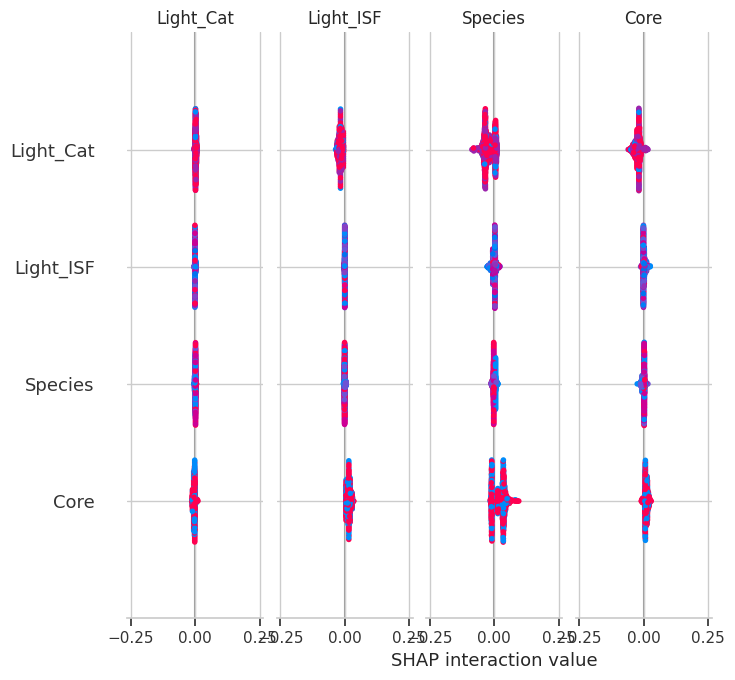

In [73]:
print(shap_values.shape)  # Check the shape of shap_values
print(shap_values)  # Print a few values to see if they are calculated
print(X_test.dtypes)  # Check data types of features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Access the shap values for the first sample and the first class
shap_values_for_first_sample = shap_values[0,:,0]  # Get values for first sample and desired class

# Now use these values in the force plot
shap.force_plot(explainer.expected_value[0], shap_values_for_first_sample, X_test.iloc[0]) # original
# shap.force_plot(shap_values[0], X_test.iloc[0]) # Simplified force plot - May still be incorrect

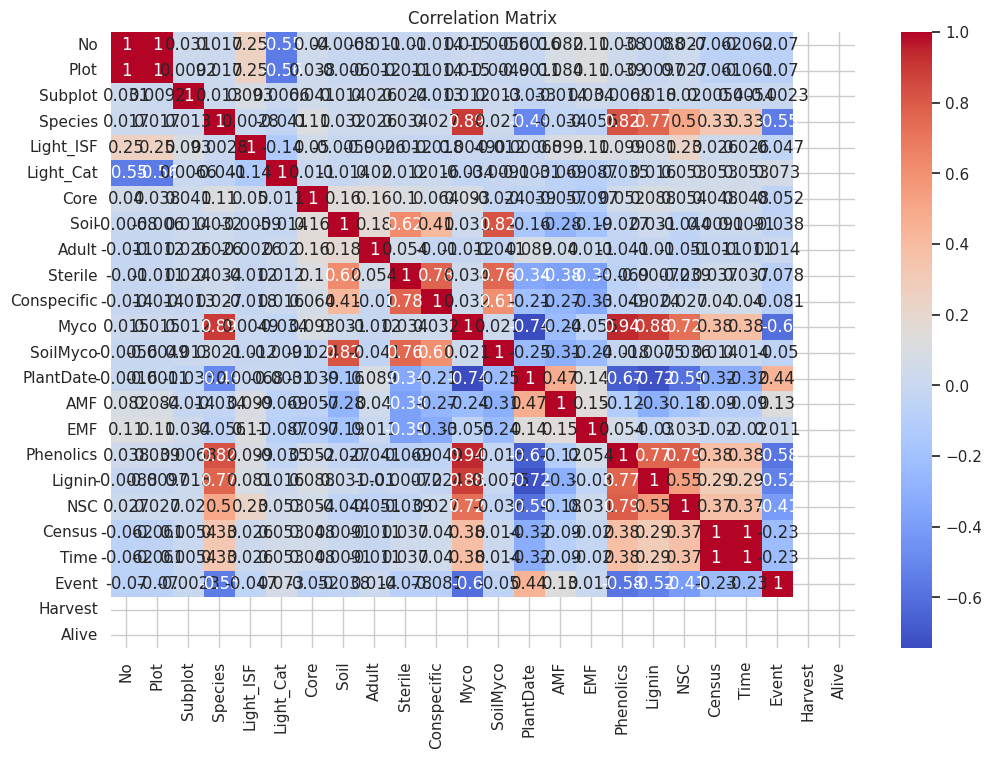

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-75-ad3e4db5e967>:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Borough_tree_list_2021.csv")


Classification Report:
                     precision    recall  f1-score   support

Early Mature(16-30)       0.73      0.73      0.73      2702
      Mature(31-80)       0.79      0.76      0.77      2646
Over Mature(81-150)       0.43      0.43      0.43         7
   Veteran(over150)       0.80      0.75      0.78       435
       Young (0-15)       0.86      0.89      0.87      2859
        Young(0-15)       0.85      0.86      0.86      2856

           accuracy                           0.81     11505
          macro avg       0.74      0.74      0.74     11505
       weighted avg       0.81      0.81      0.81     11505

Confusion Matrix:


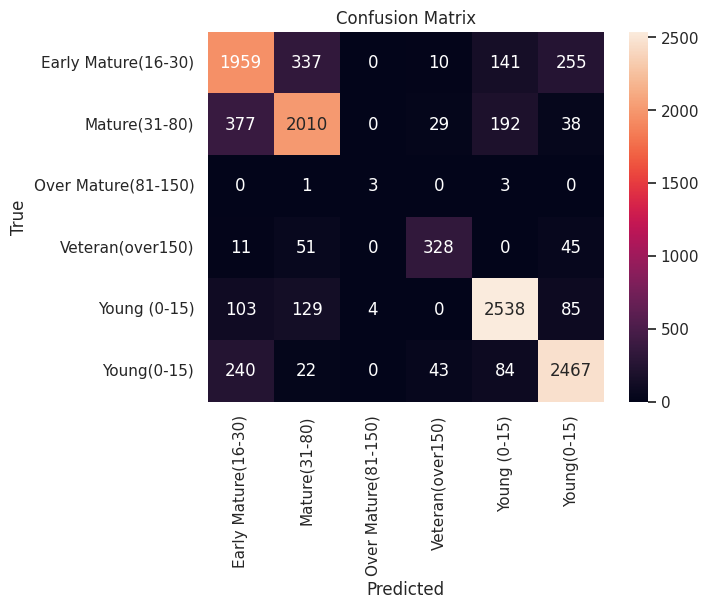

In [75]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


df2 = pd.read_csv("Borough_tree_list_2021.csv")


df2['age_group'] = df2['age_group'].str.strip()
df2 = df2[df2['age_group'].notna()]
df2 = df2[df2['age_group'] != 'Unknown']


features = ['borough', 'tree_name', 'spread_m', 'height_m', 'diameter_at_breast_height_cm']
target = 'age_group'
df2 = df2[features + [target]].dropna()


cat_features = ['borough', 'tree_name']
le_dict = {}
for col in cat_features:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    le_dict[col] = le


target_le = LabelEncoder()
df2[target] = target_le.fit_transform(df2[target])

X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_le.classes_))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

y_xgb_pred = xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_xgb_pred, target_names=target_le.classes_))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:36:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
                     precision    recall  f1-score   support

Early Mature(16-30)       0.75      0.76      0.75      2702
      Mature(31-80)       0.83      0.75      0.79      2646
Over Mature(81-150)       0.40      0.57      0.47         7
   Veteran(over150)       0.80      0.81      0.80       435
       Young (0-15)       0.85      0.93      0.89      2859
        Young(0-15)       0.88      0.87      0.87      2856

           accuracy                           0.83     11505
          macro avg       0.75      0.78      0.76     11505
       weighted avg       0.83      0.83      0.83     11505



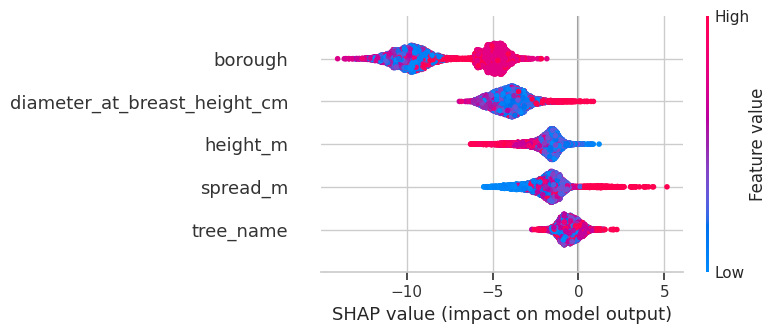

In [77]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap_values = shap_values.sum(axis=2)

shap.summary_plot(shap_values, X_test, feature_names=features)

In [78]:
print(df1.columns.tolist())
print(df2.columns.tolist())

['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event', 'Harvest', 'Alive']
['borough', 'tree_name', 'spread_m', 'height_m', 'diameter_at_breast_height_cm', 'age_group']


In [79]:
df1_text_entries = df1[['Plot', 'Species', 'Alive']].astype(str).agg(
    lambda x: f"Species: {x['Species']} | Plot: {x['Plot']} | Alive: {x['Alive']}", axis=1
)


In [80]:
df2_text_entries = df2[['borough', 'tree_name', 'age_group']].astype(str).agg(
    lambda x: f"Tree species: {x['tree_name']} | Borough: {x['borough']} | Age group: {x['age_group']}", axis=1
)


In [81]:
combined_text_entries = pd.concat([df1_text_entries, df2_text_entries], ignore_index=True)


In [82]:
!pip install -q sentence-transformers


In [83]:

from sentence_transformers import SentenceTransformer, util


model = SentenceTransformer('all-MiniLM-L6-v2')
combined_embeddings = model.encode(combined_text_entries.tolist(), convert_to_tensor=True)

def query_tree_info(query_text, top_k=5):
    query_embedding = model.encode([query_text], convert_to_tensor=True)
    hits = util.semantic_search(query_embedding, combined_embeddings, top_k=top_k)[0]
    results = [combined_text_entries[i['corpus_id']] for i in hits]
    return results

example_1 = "Which tree species are suitable for Queens?"
example_2 = "What is the tree survival status in Plot 10?"
example_3 = "List young trees planted in Brooklyn."

for query in [example_1, example_2, example_3]:
    print(f"\n🔎 Query: {query}")
    for res in query_tree_info(query):
        print("  ➤", res)



🔎 Query: Which tree species are suitable for Queens?
  ➤ Tree species: 159 | Borough: 1 | Age group: 1
  ➤ Tree species: 159 | Borough: 1 | Age group: 1
  ➤ Tree species: 159 | Borough: 1 | Age group: 0
  ➤ Tree species: 159 | Borough: 6 | Age group: 1
  ➤ Tree species: 159 | Borough: 5 | Age group: 0

🔎 Query: What is the tree survival status in Plot 10?
  ➤ Species: 0 | Plot: 10 | Alive: 0
  ➤ Species: 0 | Plot: 10 | Alive: 0
  ➤ Species: 0 | Plot: 10 | Alive: 0
  ➤ Species: 0 | Plot: 10 | Alive: 0
  ➤ Species: 0 | Plot: 10 | Alive: 0

🔎 Query: List young trees planted in Brooklyn.
  ➤ Tree species: 1 | Borough: 21 | Age group: 1
  ➤ Tree species: 1 | Borough: 15 | Age group: 1
  ➤ Tree species: 1 | Borough: 14 | Age group: 1
  ➤ Tree species: 1 | Borough: 14 | Age group: 1
  ➤ Tree species: 1 | Borough: 14 | Age group: 1


In [84]:
query_tree_info("What species are present in Plot 12?")


['Species: 2 | Plot: 12 | Alive: 0',
 'Species: 2 | Plot: 12 | Alive: 0',
 'Species: 2 | Plot: 12 | Alive: 0',
 'Species: 2 | Plot: 12 | Alive: 0',
 'Species: 2 | Plot: 12 | Alive: 0']